# 第三次作业-神经网络

## 1.导入数据

继续沿用第一、第二次的数据

In [3]:
import pandas as pd
import numpy as np
path='data/train.csv'
df = pd.read_csv(path)
df.head()

,id,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,y
0,0,33,Private,34,26,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,...,China,China,Taiwan,Foreign born- Not a citizen of U S,2,Not in universe,2,52,95,50000+.
1,1,63,Private,7,22,Some college but no degree,0,Not in universe,Never married,Manufacturing-durable goods,...,?,?,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
2,2,71,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
3,3,43,Local government,43,10,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Education,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
4,4,57,Local government,40,32,Some college but no degree,0,Not in universe,Widowed,Entertainment,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.


## 2.数据预处理

在第二次作业中已经详细说明，这里只贴代码

In [4]:
# replace " ?" to NaN
df.replace(" ?",np.nan,inplace = True)
df.drop(['migration code-change in msa','migration code-change in reg','migration code-move within reg','migration prev res in sunbelt'],axis=1,inplace=True)
df["state of previous residence"].value_counts()
df["state of previous residence"].replace(np.nan, df['state of previous residence'].value_counts().idxmax(), inplace=True)
df["country of birth father"].value_counts()
df["country of birth father"].replace(np.nan, df['country of birth father'].value_counts().idxmax(), inplace=True)
df["country of birth mother"].value_counts()
df["country of birth mother"].replace(np.nan, df['country of birth mother'].value_counts().idxmax(), inplace=True)
df["country of birth self"].value_counts()
df["country of birth self"].replace(np.nan, df['country of birth self'].value_counts().idxmax(), inplace=True)
df.head()

,id,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,y
0,0,33,Private,34,26,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,...,China,China,Taiwan,Foreign born- Not a citizen of U S,2,Not in universe,2,52,95,50000+.
1,1,63,Private,7,22,Some college but no degree,0,Not in universe,Never married,Manufacturing-durable goods,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
2,2,71,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
3,3,43,Local government,43,10,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Education,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
4,4,57,Local government,40,32,Some college but no degree,0,Not in universe,Widowed,Entertainment,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.


In [5]:
y=df["y"]
pos=y[0]
neg=y[1]
for i in range(0,len(y)):
    if(y[i]==pos):
        y[i]=1
    else:
        y[i]=0
y

<ipython-input-5-acffe5f380f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1
<ipython-input-5-acffe5f380f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=0


0        1
1        0
2        0
3        0
4        0
        ..
54251    1
54252    0
54253    0
54254    0
54255    0
Name: y, Length: 54256, dtype: object

In [6]:
x=df.drop(["y"],axis=1)
x=df.drop(["id"],axis=1)
list=['class of worker','education',
       'enroll in edu inst last wk', 'marital stat','race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat','tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household',
       'live in this house 1 year ago', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'own business or self employed']
for i in list:
    dummy_variable_1 = pd.get_dummies(x[i])
    dummy_variable_1.drop(dummy_variable_1.columns[len(dummy_variable_1.columns)-1],axis=1,inplace=True)#哑变量若要在logistic中使用必须去掉一列，避免多重共线性
    x = pd.concat([x, dummy_variable_1], axis=1)
    x.drop(i, axis = 1, inplace=True)
dummy_variable_1 = pd.get_dummies(x["fill inc questionnaire for veteran's admin"])
x = pd.concat([x, dummy_variable_1], axis=1)
x.drop("fill inc questionnaire for veteran's admin", axis = 1, inplace=True)
x.drop("detailed industry recode", axis = 1, inplace=True)
x.drop("detailed occupation recode", axis = 1, inplace=True)
dummy_variable_1 = pd.get_dummies(x["major industry code"])
x = pd.concat([x, dummy_variable_1], axis=1)
x.drop("major industry code", axis = 1, inplace=True)
dummy_variable_1 = pd.get_dummies(x["major occupation code"])
x = pd.concat([x, dummy_variable_1], axis=1)
x.drop("major occupation code", axis = 1, inplace=True)

## 3. 神经网络

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [11]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=8000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [12]:
mlp.fit(x,y.astype("int"))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=8000,
              random_state=1)

In [13]:
scores = cross_val_score(mlp, x,y.astype("int"), cv=10, scoring='accuracy')
print(scores)

[0.97088094 0.96830077 0.97585698 0.92849244 0.95374125 0.94563214
 0.93308756 0.96442396 0.95336406 0.96387097]


In [14]:
print(scores.mean())

0.9557651077505305


## 4.调参

1.hidden_layer_sizes : 元组形式,长度n_layers-2,默认(100,),第i元素表示第i个神经元的个数
2.activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’},默认"relu"
‘identity’: f(x) = x
‘logistic’:f(x) = 1 / (1 + exp(-x))
‘tanh’ : f(x) = tanh(x)
‘relu’ : f(x) = max(0, x)
3.solver:{‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
4.lbfgs：quasi-Newton方法的优化器
5.sgd：随机梯度下降
6.adam： Kingma, Diederik, and Jimmy Ba提出的机遇随机梯度的优化器 注意：默认solver ‘adam’在相对较大的数据集上效果比较好（几千个样本或者更多），对小数据集来说，lbfgs收敛更快效果也更好
7.alpha:float,可选的，默认0.0001,正则化项参数
8.batch_size:int , 可选的，默认‘auto’,随机优化的minibatches的大小，如果solver是‘lbfgs’，分类器将不使用minibatch，当设置成‘auto’，batch_size=min(200,n_samples)
9.learning_rate:{‘constant’，‘invscaling’, ‘adaptive’},默认‘constant’，用于权重更新，只有当solver为’sgd‘时使用
‘constant’: 有‘learning_rate_init’给定的恒定学习率
‘incscaling’：随着时间t使用’power_t’的逆标度指数不断降低学习率learning_rate_effective_learning_rate = learning_rate_init / pow(t, power_t)
‘adaptive’：只要训练损耗在下降，就保持学习为’learning_rate_init’不变，当连续两次不能降低训练损耗或验证分数停止升高至少tol时，将当前学习率除以5.
10.max_iter: int，可选，默认200，最大迭代次数。
11.random_state:int 或RandomState，可选，默认None，随机数生成器的状态或种子
12.shuffle: bool，可选，默认True,只有当solver=’sgd’或者‘adam’时使用，判断是否在每次迭代时对样本进行清洗。
13.tol：float, 可选，默认1e-4，优化的容忍度
14.learning_rate_int:double,可选，默认0.001，初始学习率，控制更新权重的补偿，只有当solver=’sgd’ 或’adam’时使用。
15.power_t: double, optional, default 0.5，只有solver=’sgd’时使用，是逆扩展学习率的指数.当learning_rate=’invscaling’，用来更新有效学习率。
16.verbose : bool, optional, default False,是否将过程打印到stdout
17.warm_start : bool, optional, default False,当设置成True，使用之前的解决方法作为初始拟合，否则释放之前的解决方法
18.momentum : float, default 0.9,Momentum(动量） for gradient descent update. Should be between 0 and 1. Only used when solver=’sgd’.
19.nesterovs_momentum : boolean, default True, Whether to use Nesterov’s momentum. Only used when solver=’sgd’ and momentum > 0
20.early_stopping : bool, default False,Only effective when solver=’sgd’ or ‘adam’,判断当验证效果不再改善的时候是否终止训练，当为True时，自动选出10%的训练数据用于验证并在两步连续爹迭代改善低于tol时终止训练
21.validation_fraction: float, optional, default 0.1,用作早期停止验证的预留训练数据集的比例，早0-1之间，只当early_stopping=True有用
22.beta_1 : float, optional, default 0.9，Only used when solver=’adam’，估计一阶矩向量的指数衰减速率，[0,1)之间。
23.beta_2 : float, optional, default 0.999,Only used when solver=’adam’估计二阶矩向量的指数衰减速率[0,1)之间
24.psilon: float, optional, default 1e-8,Only used when solver=’adam’数值稳定值。
【1】https://zhuanlan.zhihu.com/p/47175127

In [16]:
from sklearn.model_selection import train_test_split
splits = train_test_split(x ,y ,test_size=0.95, random_state=42)
x_train, x_test, y_train, y_test = splits #为了节省时间，可以先在小样本上进行调参

In [18]:
learning_rate=[0.0001,0.001,0.01]
accu=[]
for i in learning_rate:
       mlp=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=i, max_iter=8000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
       mlp.fit(x_train,y_train.astype("int")) 
       scores = cross_val_score(mlp, x,y.astype("int"), cv=10, scoring='accuracy')
       accu.append(scores.mean()) 

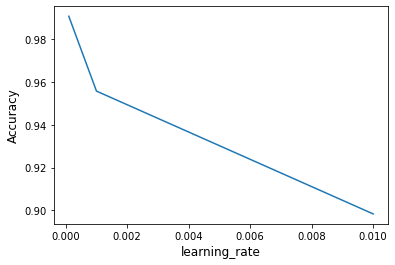

In [19]:
import matplotlib.pyplot as plt 
plt.plot(learning_rate,accu)
plt.xlabel("learning_rate", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

learning_rate选择0.0001明显要好于其他

In [22]:
acti=['identity','logistic','tanh','relu']
accu2=[]
for i in acti:
       mlp=MLPClassifier(activation=i, alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=8000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
       mlp.fit(x_train,y_train.astype("int")) 
       scores = cross_val_score(mlp, x_train,y_train.astype("int"), cv=3, scoring='accuracy')
       accu2.append(scores.mean()) 

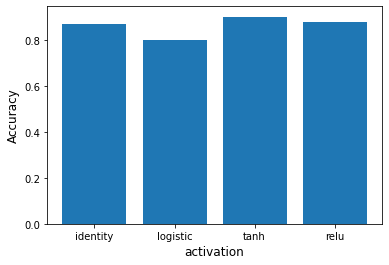

In [24]:
plt.bar(acti,accu2)
plt.xlabel("activation", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

In [26]:
layer=[3,4,5,6,7]
accu3=[]
for i in layer:
       mlp=MLPClassifier(alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(i, 2), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=8000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
       mlp.fit(x_train,y_train.astype("int")) 
       scores = cross_val_score(mlp, x_train,y_train.astype("int"), cv=3, scoring='accuracy')
       accu3.append(scores.mean()) 

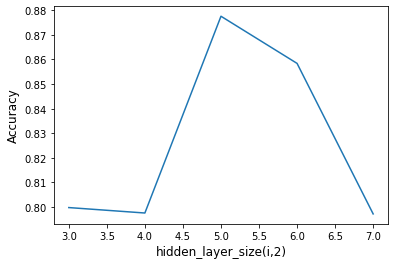

In [28]:
plt.plot(layer,accu3)
plt.xlabel("hidden_layer_size(i,2)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

In [30]:
layer2=[2,3,4,5]
accu4=[]
for i in layer2:
       mlp=MLPClassifier(alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,i), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=8000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
       mlp.fit(x_train,y_train.astype("int")) 
       scores = cross_val_score(mlp, x_train,y_train.astype("int"), cv=3, scoring='accuracy')
       accu4.append(scores.mean()) 

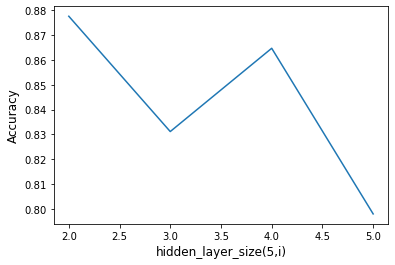

In [32]:
plt.plot(layer2,accu4)
plt.xlabel("hidden_layer_size(5,i)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

In [33]:
mlp=MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=8000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [34]:
mlp.fit(x,y.astype("int"))
scores = cross_val_score(mlp, x,y.astype("int"), cv=10, scoring='accuracy')
print(scores)

[0.95816439 0.92241062 0.9489495  0.92793955 0.93623295 0.95392554
 0.88866359 0.91834101 0.92718894 0.91539171]


In [35]:
print(scores.mean())

0.9297207811510037


总而言之，在大样本上准确度反而下降了。

In [36]:
mlp=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=8000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [37]:
mlp.fit(x,y.astype("int"))
scores = cross_val_score(mlp, x,y.astype("int"), cv=10, scoring='accuracy')
print(scores)

[0.79966826 0.79450792 0.80298562 0.8051972  0.79248065 0.79450792
 0.79447005 0.79447005 0.79447005 0.80534562]


In [38]:
print(scores.mean())

0.7978103346067152


In [ ]:
将solver改为sgd，准确度下降。